In [11]:
# 🚗 Tunisia Cars Price Prediction — Linear Regression

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [12]:
# 2️⃣ Load Dataset
df = pd.read_csv('../data/raw/tunisia_cars_dataset.csv')
print(f'Dataset shape: {df.shape}')
display(df.head())

Dataset shape: (30000, 23)


,brand,model,year,mileage,fuel,gearbox,vehicle_condition,car_body,horsepower,engine_size,number_of_owners,accident_history,import_or_local,location,color,air_conditioning,parking_sensor,rear_camera,sunroof,alloy_wheels,bluetooth,gps,price
0,Kia,Picanto,2013,109951,Diesel,Manuelle,tres bon etat,citadine,78,1.0,1,0,local,Kairouan,noir,0,0,1,0,1,1,0,4642
1,Ford,Focus,2014,140294,Essence,Manuelle,bon etat,citadine,87,1.1,1,1,local,Kairouan,vert,0,1,1,0,0,1,0,3370
2,Dacia,Sandero,2013,229089,Essence,Automatique,excellent,compacte,128,1.4,2,0,local,Nabeul,rouge,1,0,1,0,0,0,0,2000
3,Hyundai,i20,2007,286194,Hybride,Manuelle,excellent,citadine,82,1.1,3,0,local,Nabeul,rouge,0,0,1,1,0,0,0,2000
4,Renault,Captur,2005,103053,Essence,Automatique,tres bon etat,break,107,1.1,1,0,imported,Gafsa,bleu,1,1,1,0,0,0,1,2243


In [13]:
# 3️⃣ Basic Summary
df.info()
display(df.describe())
print('Missing values per column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              30000 non-null  object 
 1   model              30000 non-null  object 
 2   year               30000 non-null  int64  
 3   mileage            30000 non-null  int64  
 4   fuel               30000 non-null  object 
 5   gearbox            30000 non-null  object 
 6   vehicle_condition  30000 non-null  object 
 7   car_body           30000 non-null  object 
 8   horsepower         30000 non-null  int64  
 9   engine_size        30000 non-null  float64
 10  number_of_owners   30000 non-null  int64  
 11  accident_history   30000 non-null  int64  
 12  import_or_local    30000 non-null  object 
 13  location           30000 non-null  object 
 14  color              30000 non-null  object 
 15  air_conditioning   30000 non-null  int64  
 16  parking_sensor     300

,year,mileage,horsepower,engine_size,number_of_owners,accident_history,air_conditioning,parking_sensor,rear_camera,sunroof,alloy_wheels,bluetooth,gps,price
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2015.252367,145888.924167,127.137000,1.599887,1.805633,0.150733,0.399167,0.401233,0.398200,0.398467,0.403367,0.400233,0.399733,11307.436467
std,5.727690,104033.308237,34.544567,0.456236,0.871520,0.357795,0.489735,0.490156,0.489535,0.489591,0.490581,0.489954,0.489852,11839.158968
min,2005.000000,3000.000000,60.000000,0.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,2010.000000,60810.750000,103.000000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
50%,2016.000000,125892.500000,126.000000,1.600000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7660.500000
75%,2020.000000,211939.250000,150.000000,1.900000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15713.500000
max,2024.000000,652014.000000,220.000000,3.300000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84743.000000


Missing values per column:
brand                0
model                0
year                 0
mileage              0
fuel                 0
gearbox              0
vehicle_condition    0
car_body             0
horsepower           0
engine_size          0
number_of_owners     0
accident_history     0
import_or_local      0
location             0
color                0
air_conditioning     0
parking_sensor       0
rear_camera          0
sunroof              0
alloy_wheels         0
bluetooth            0
gps                  0
price                0
dtype: int64


C:\Users\21629\AppData\Local\Temp\ipykernel_13540\3149144770.py:15: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Learn Programming\MachineLearning\Car_Valuation_Tunisia\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Learn Programming\MachineLearning\Car_Valuation_Tunisia\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


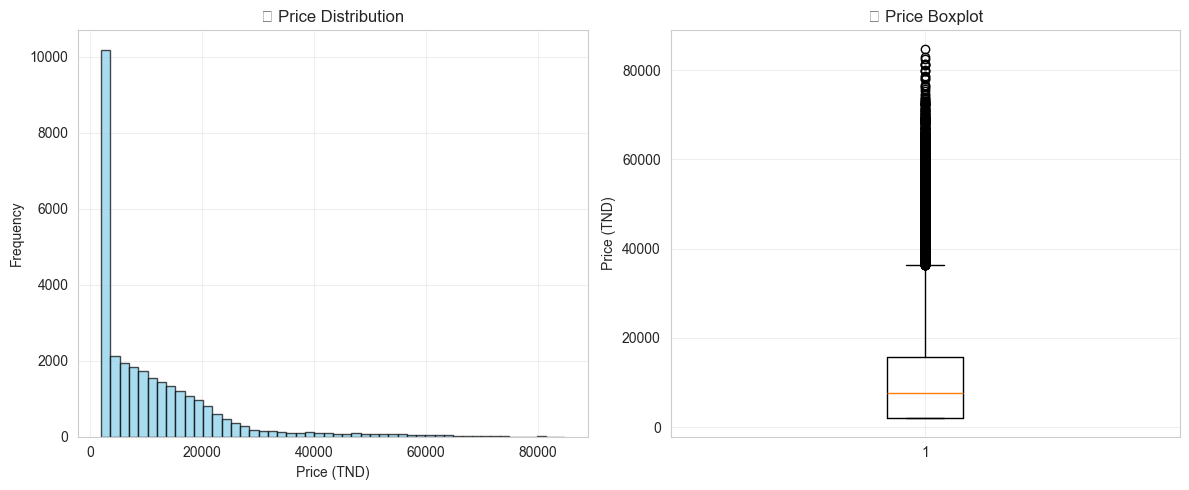

c:\Learn Programming\MachineLearning\Car_Valuation_Tunisia\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


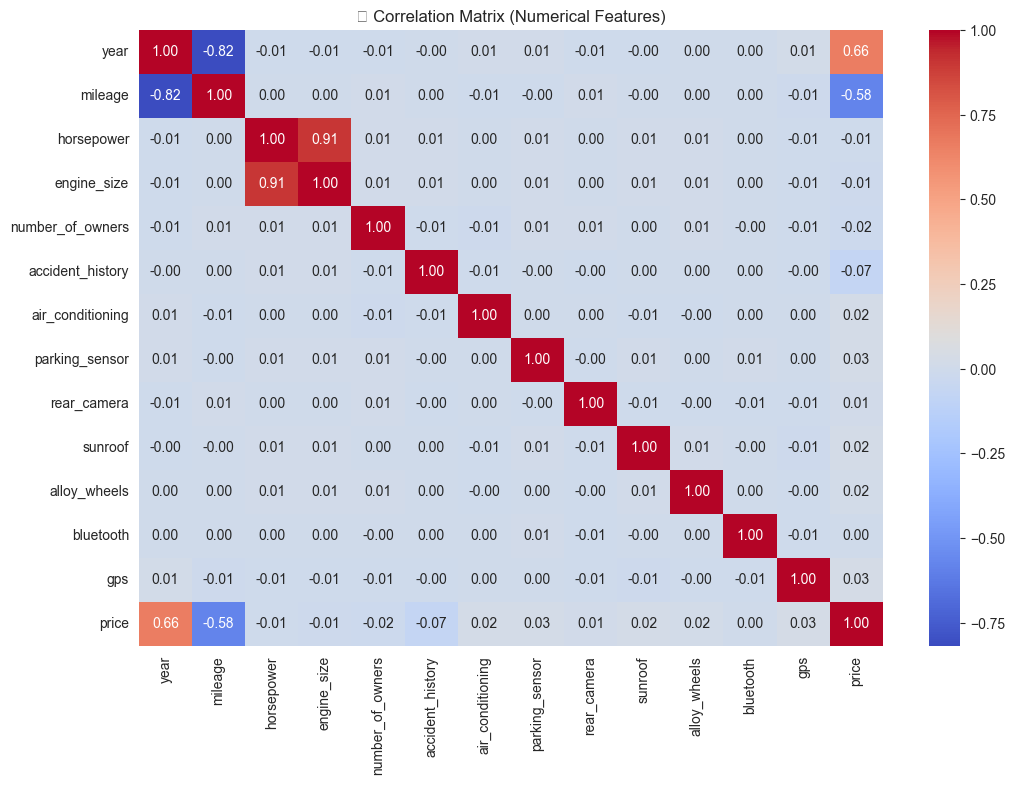

In [14]:
# 4️⃣ Key Graphs: Price Distribution & Numeric Correlations
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Price (TND)')
plt.ylabel('Frequency')
plt.title('💰 Price Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.boxplot(df['price'], vert=True)
plt.ylabel('Price (TND)')
plt.title('💰 Price Boxplot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('🔥 Correlation Matrix (Numerical Features)')
plt.show()

In [15]:
# 5️⃣ Feature Engineering
categorical_cols = ['brand','model','fuel','gearbox','vehicle_condition','car_body','import_or_local','location','color']
df['age'] = 2025 - df['year']
df['mileage_per_year'] = df['mileage'] / df['age'].replace(0,1)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']
print('Features:', X.shape, '| Target:', y.shape)

Features: (30000, 127) | Target: (30000,)


In [16]:
# 6️⃣ Split, Scale, Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_test = lin_reg.predict(X_test_scaled)

R²: 0.7742 | MAE: 3,888 TND | RMSE: 5,615 TND | MAPE: 85.97%


c:\Learn Programming\MachineLearning\Car_Valuation_Tunisia\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


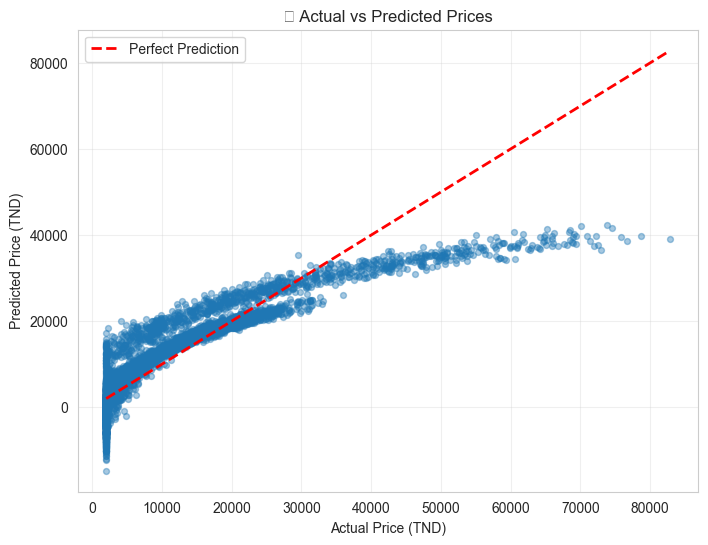

In [17]:
# 7️⃣ Model Performance + Key Plot
r2_test = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print(f'R²: {r2_test:.4f} | MAE: {mae:,.0f} TND | RMSE: {rmse:,.0f} TND | MAPE: {mape:.2f}%')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.4, s=18)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (TND)')
plt.ylabel('Predicted Price (TND)')
plt.title('🎯 Actual vs Predicted Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [18]:
# 8️⃣ Save Model Artifact for App
artifact = {
    'model_name': 'Linear Regression',
    'model': lin_reg,
    'scaler': scaler,
    'numeric_columns': numeric_cols,
    'feature_columns': X_train_scaled.columns.tolist(),
    'categorical_columns': ['brand','model','fuel','gearbox','vehicle_condition','car_body','import_or_local','location','color'],
    'engineered_features': ['age', 'mileage_per_year']
}
joblib.dump(artifact, '../models/linear_regression_tunisia_cars.pkl')
print("✓ Artifact saved at ../models/linear_regression_tunisia_cars.pkl")


✓ Artifact saved at ../models/linear_regression_tunisia_cars.pkl
